## Instrument Sandbox

Each cell contains example usages of all the instruments

Very useful for sending single commands, like using the CryoSwitch to change fridge lines, or using the SG_Anritsu to turn the TWPA on/off


In [3]:
%load_ext autoreload
%autoreload 3

import sys, pyvisa, time
from pathlib import Path

current_path = Path(".")
misc_path = current_path / "misc"
instruments_path = current_path / "instruments"

# easy access to all instrument drivers
sys.path.append(str(current_path))
sys.path.append(str(misc_path))
sys.path.append(str(instruments_path))

pyvisa.log_to_screen(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Cryoswitch

CONVERTER STATUS: Voltage set to 19.715V
Pulsing switch A - contact 3


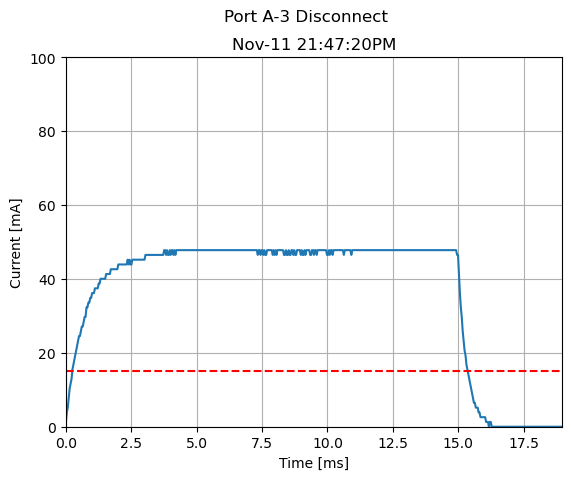

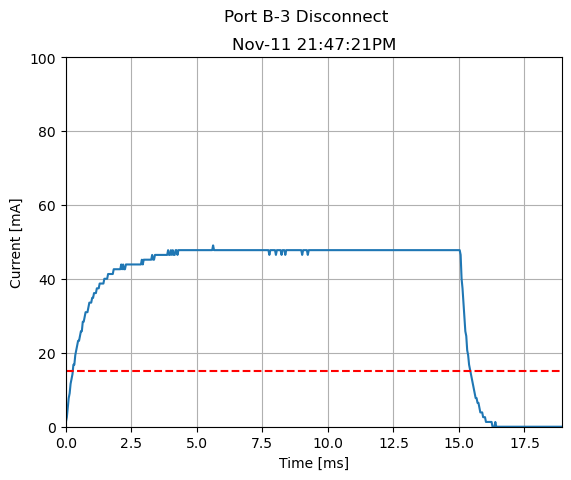

In [ ]:
from instruments.CryoSwitchController.CryoSwitchController import Cryoswitch


if "switch" not in locals():
    switch = Cryoswitch(IP="192.168.0.117")
    switch.start() ## -> Initialization of the internal hardware
    switch.get_pulse_history(pulse_number=5, port='A')      ## -> Show the last 5 pulses send through on port A
    switch.set_output_voltage(5)                            ## -> Set the output pulse voltage to 5V


# switch.get_internal_temperature()
# switch.set_output_voltage(5)                            ## -> Set the output pulse voltage to 5V

# contact_disconnect = int(input("Which contact would you like to DISCONNECT? Enter a number from 1-6:  "))
# contact_connect = int(input("Which contact would you like to CONNECT? Enter a number from 1-6:   "))

# response = input(f"A pulse will be sent to line {contact_disconnect} to DISCONNECT it- is this correct? [Y/N]")
# assert response.upper().strip() == "Y".strip()

# response = input(f"A pulse will be sent to line {contact_connect} to CONNECT it- is this correct? [Y/N]")
# assert response.upper().strip() == "Y".strip()

# response = input(f"\n\nAre the HEMTs and the TWPA off?? Press Enter to send pulses!\n\n")

# assert response.upper().strip() == "Y".strip()
# print(f"Pulsing switch A - contact {contact_disconnect}")
# profile = switch.connect(port='A', contact=contact_disconnect)
# time.sleep(1)
# profile = switch.connect(port='B', contact=contact_disconnect)

# time.sleep(2)
    
# assert response.upper().strip() == "Y".strip()
# print(f"Pulsing switch A - contact {contact_connect}")
# profile = switch.connect(port='A', contact=contact_connect)
# time.sleep(1)
# profile = switch.connect(port='B', contact=contact_connect)

contact_connect = 1
contact_disconnect = 3

print(f"Pulsing switch A - contact {contact_disconnect}")
profile = switch.disconnect(port='A', contact=contact_disconnect)
time.sleep(1)
profile = switch.disconnect(port='B', contact=contact_disconnect)

# print(f"Pulsing switch A - contact {contact_connect}")
# profile = switch.connect(port='A', contact=contact_connect)
# time.sleep(1)
# profile = switch.connect(port='B', contact=contact_connect)





### Agilent VNA


In [ ]:
from VNA_Keysight import VNA_Keysight

VNA_Keysight_InstrConfig = {
    "instrument_name" : "VNA_Keysight",
    # "rm_backend" : "@py",
    "rm_backend" : None,
    "instr_address" : 'TCPIP0::192.168.0.105::inst0::INSTR',
    # "instr_address" : 'TCPIP0::K-N5231B-57006.local::inst0::INSTR',
}

PNA_X = VNA_Keysight(VNA_Keysight_InstrConfig, debug=True)



### Anritsu Signal Generator


In [ ]:
from SG_Anritsu import SG_Anritsu

TEST_Config = {
    "instrument_name" : "TEST",
    "rm_backend" : None,
    "instr_address" : 'GPIB::7::INSTR',  # test instr
}

TWPA_Config = {
    "instrument_name" : "TWPA",
    "rm_backend" : None,
    "instr_address" : 'GPIB::8::INSTR',  # twpa
}

pyvisa.log_to_screen(False)

if "TEST_SG" not in locals():
    TEST_SG = SG_Anritsu(TEST_Config, debug=True)

if "TWPA_SG" not in locals():
    TWPA_SG = SG_Anritsu(TWPA_Config, debug=True)

All_SGs = [TWPA_SG, TEST_SG]

for SG in All_SGs:  
    # SG.open_pyvisa_backend()
    # SG.open_pyvisa_resource()
    # SG.debug_force_clear()
    print(f"\n\nSwitching to: {SG.instr_config["instrument_name"]}")
    # print(SG.resource.write("*CLS"))
    # print(SG.resource.query("*IDN?"))
     
    # # time.sleep(2)
    # print(f"{SG.resource.query("OUTP:STAT?") = }")
    
    # print(f"{SG.get_power() = }")
    # print(f"{SG.set_power(-30) = }")
    
    # print(f"{SG.get_freq() = }")
    # print(f"{SG.set_freq(3e9) = }")
    
    # print(f"{SG.get_output() = }")
    # print(f"{SG.set_output(False) = }")
    
    # SG.set_output(True)
    
    
    
    






Switching to: TWPA


Switching to: TEST


NameError: name 'delay' is not defined

### Rohde & Schwarz Spectrum Analyzer


In [11]:
from SA_RnS_FSEB20 import SA_RnS_FSEB20

SA_RnS_InstrConfig = {
    "instrument_name" : "SA_RnS",
    # "rm_backend" : "@py",
    "rm_backend" : None,
    "instr_address" : 'GPIB::20::INSTR',      
}

SIG_Analyzer = SA_RnS_FSEB20(SA_RnS_InstrConfig, debug=True)



[SA_RNS]  Initializing using backend `None`
[SA_RNS]   **[DEBUG]**   Pyvisa resource manager successfully initialized
[SA_RNS]   **[DEBUG]**   Reading until exception occurs!
[SA_RNS]   debug_force_clear -> 0
[SA_RNS]   **[DEBUG]**    Attempting Read:         [0]

VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

